In [52]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [53]:
aisles = pd.read_csv('./data/aisles.csv')
dept = pd.read_csv('./data/departments.csv')
orders = pd.read_csv('./data/orders.csv')
products = pd.read_csv('./data/products.csv')

In [54]:
orders_p = pd.read_csv('./data/order_products__prior.csv')
orders_tr = pd.read_csv('./data/order_products__train.csv')

In [55]:
prior_order = orders.query('eval_set == "prior"')
train_order = orders.query('eval_set == "train"')
test_order = orders.query('eval_set == "test"')

In [56]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [57]:
order_p_detail = pd.merge(orders_p, prior_order, on='order_id', how='left')

In [58]:
order_tr_detail = pd.merge(orders_tr, train_order, on='order_id', how='left')

In [59]:
product_full_detail = pd.merge(products, dept, on='department_id').merge(aisles, on='aisle_id')

In [60]:
consol_detail = pd.merge(order_p_detail, product_full_detail, on='product_id')

In [61]:
# Final results with all product details consolidated into one table
consol_detail.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,dairy eggs,eggs
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,dairy eggs,eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,dairy eggs,eggs


In [62]:
consol_detail[consol_detail['order_id']==2]

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
19400,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce,fresh vegetables
86849,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry,spices seasonings
93148,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry,oils vinegars
93892,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry,baking ingredients
94461,2,17794,6,1,202279,prior,3,5,9,8.0,Carrots,83,4,produce,fresh vegetables
167197,2,40141,7,1,202279,prior,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13,pantry,doughs gelatins bake mixes
168386,2,1819,8,1,202279,prior,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,88,13,pantry,spreads
170810,2,43668,9,0,202279,prior,3,5,9,8.0,Classic Blend Cole Slaw,123,4,produce,packaged vegetables fruits


### Exploring Product Category

In [63]:
product_order = consol_detail.groupby(['department','reordered'])['order_id'].nunique().unstack(level=1)

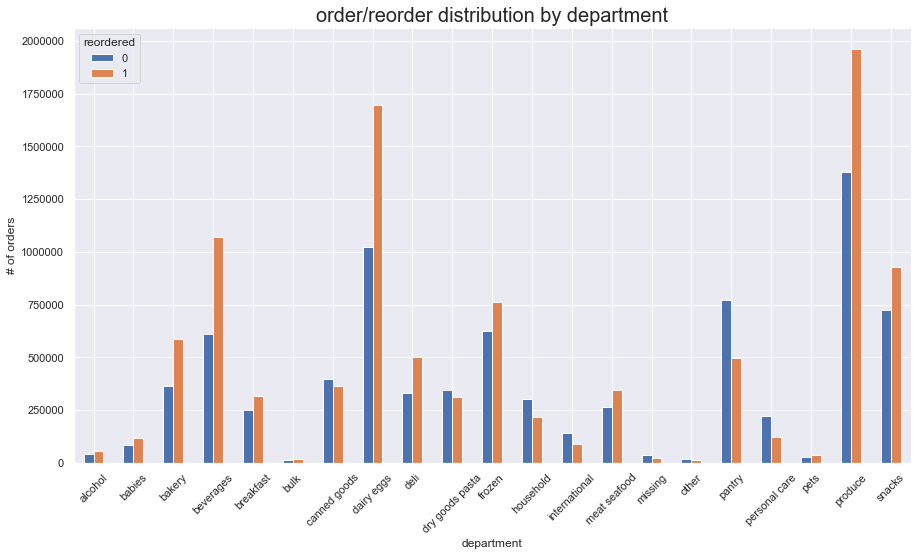

In [64]:
product_order.plot(kind='bar', figsize=(15,8))
plt.xticks(rotation=45)
plt.ylabel('# of orders')
plt.title('order/reorder distribution by department', fontsize=20)
plt.show()

##### At the department level, beverages, dairy and produce appear to have the highest re-purchasing rates. Pantry does not seem to be popular items on re-purchasing.

We will dive into these three categories to see if there are different re-purchasing patterns at the aisle level.

In [65]:
aisle_order = consol_detail.groupby(['department', 'aisle','reordered'])['order_id'].nunique().unstack(level=2)

In [66]:
def plotting_func(dataset, string):
    dataset.loc[string].plot(kind='bar', figsize=(8,4))
    plt.xticks(rotation=45)
    plt.ylabel('# of orders')
    plt.title('# of orders by {}'.format(string), fontsize=15)
    plt.tight_layout()
    plt.show()

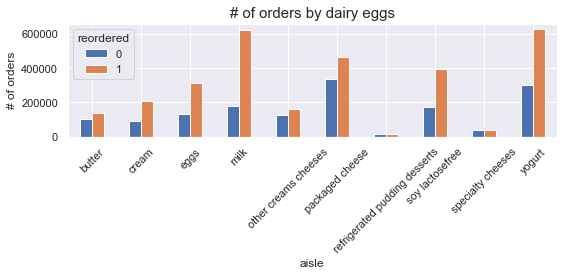

In [67]:
plotting_func(aisle_order, 'dairy eggs')

Re-purchasing pattern is consistent across all aisle except cheeses, milk and yogurt is the most popular aisles

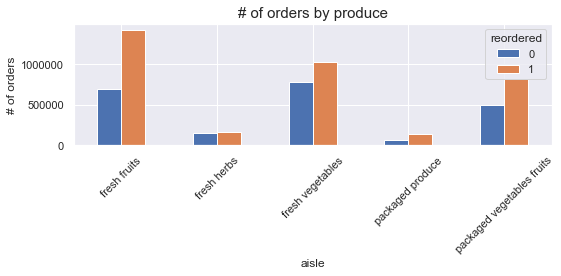

In [68]:
plotting_func(aisle_order, 'produce')

Fruits appears to have stronger re-purchasing pattern.

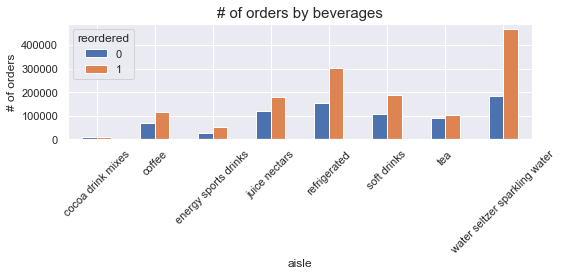

In [69]:
plotting_func(aisle_order, 'beverages')

Water is predominately the category that drives re-purchasing

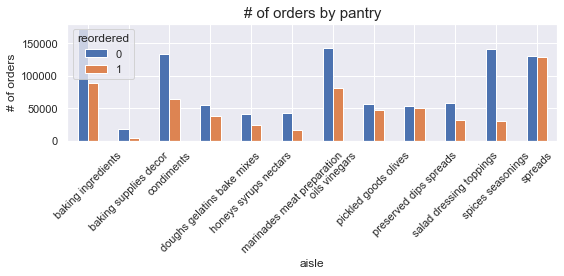

In [70]:
plotting_func(aisle_order, 'pantry')

All aisles within pantry do not have strong re-purchasing pattern

**Observation**: The more generic the product is (i.e. water, milk, fruits), the higher the rate for re-purchasing

### Exploring Day and Hour of ordering

In [71]:
dow_hour_orders = consol_detail.groupby(['order_dow', 'order_hour_of_day'])['order_id'].nunique().reset_index()

In [72]:
dow_hour_pivot = dow_hour_orders.pivot(columns='order_dow',index='order_hour_of_day', values='order_id')

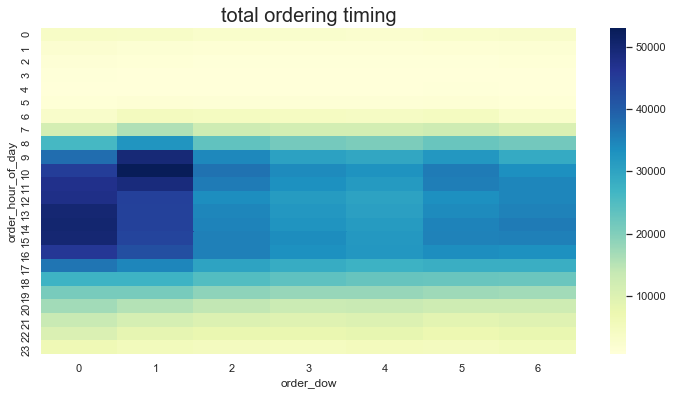

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(dow_hour_pivot, cmap="YlGnBu")
plt.title('total ordering timing', fontsize=20)
plt.show()

Day 0 and 1 have the most orders being placed. Generally, most orders are placed between 8am to 6pm. 

We will check if it applies to re-ordering orders

In [74]:
dow_hour_reorders = consol_detail.query('reordered == 1').groupby(['order_dow', 'order_hour_of_day'])['order_id'].nunique().reset_index()

In [75]:
dow_hour_reorder_pivot = dow_hour_reorders.pivot(columns='order_dow',index='order_hour_of_day', values='order_id')

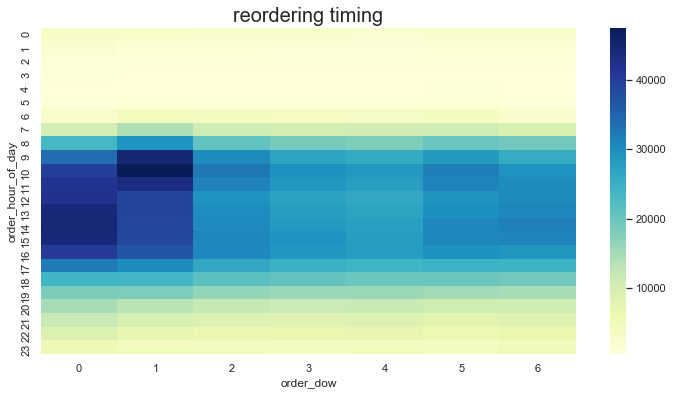

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(dow_hour_reorder_pivot, cmap="YlGnBu")
plt.title('reordering timing', fontsize=20)
plt.show()

Re-ordering pattern is consistent with total ordering pattern.

### Exploring day lags on reordering and order frequency

We want to see how often user will purchase from Instacart in terms of days, how many purchases will a user make with Instacart, access users attrition rates. 

**Disclaimer**: Users who had joined longer will naturally have more purchase history while newer users will only have 1-2 purchases. Since dataset did not state the date that a particular user was joined and when the purchases were made, we are developing observations by ***ignoring the time factor*** on length of membership and date of purchase. We assume that current dataset is a good representative of user purchase habits.

In [77]:
prior_train = pd.concat([prior_order, train_order])

In [78]:
prior_train = prior_train.sort_values(by=['user_id', 'order_number'], ascending=[1,1])

In [79]:
prior_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [80]:
prior_train_select = prior_train[['order_number', 'days_since_prior_order']]

In [81]:
order_lag = prior_train_select.groupby('order_number').agg({'days_since_prior_order':'mean'}).reset_index()

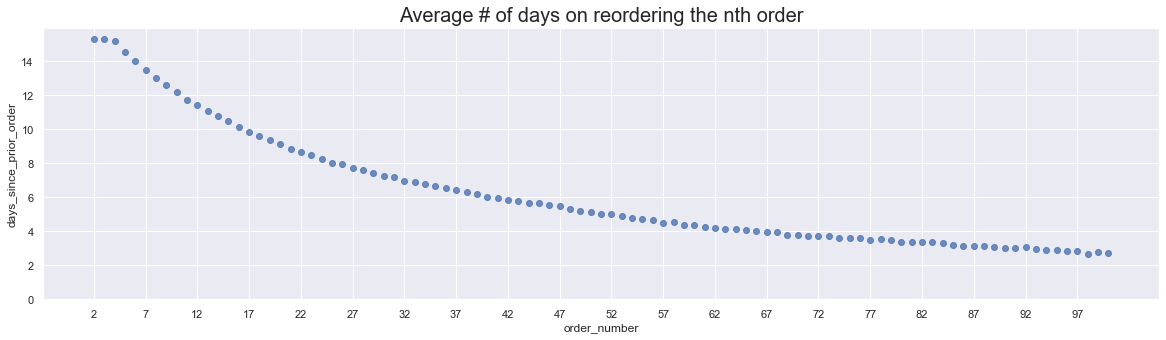

In [82]:
plt.figure(figsize = (20,5))
sns.regplot(x='order_number', y='days_since_prior_order', data=order_lag,fit_reg=False)
plt.xticks(np.arange(2,100,5))
plt.yticks(np.arange(0,16,2))
plt.title('Average # of days on reordering the nth order', fontsize=20)
plt.show()

**Observation**: For the first 3 orders, the day separation is about 15 days, and gradually decrease as the user re-order more often.

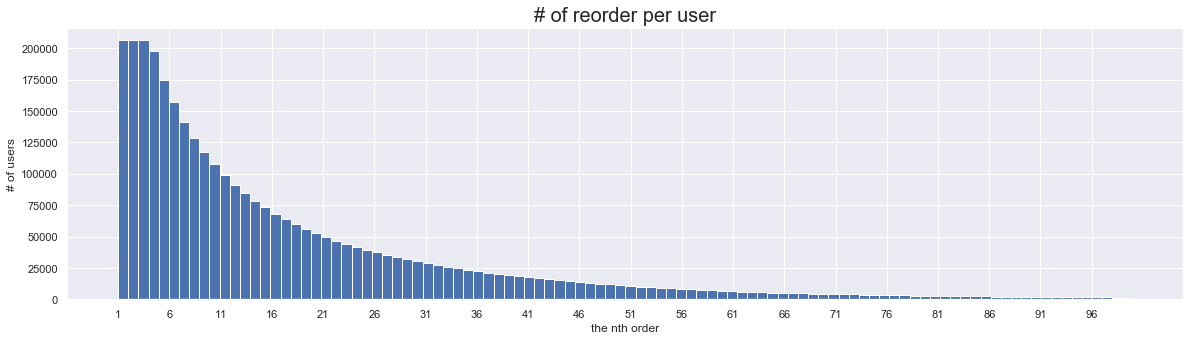

In [83]:
plt.figure(figsize = (20,5))
plt.hist(prior_train_select['order_number'],bins=100)
plt.xticks(np.arange(1,100,5))
plt.xlabel('the nth order')
plt.ylabel('# of users')
plt.title('# of reorder per user', fontsize=20)
plt.show()

**Observations**: Majority of the users will use the service for 3-4 times, and observe user attrition for starting the 5th purchases.

To convert that into percentage:

In [84]:
table = pd.DataFrame(prior_train_select['order_number'].value_counts())

In [85]:
table['%_penetration'] = table['order_number']/206209

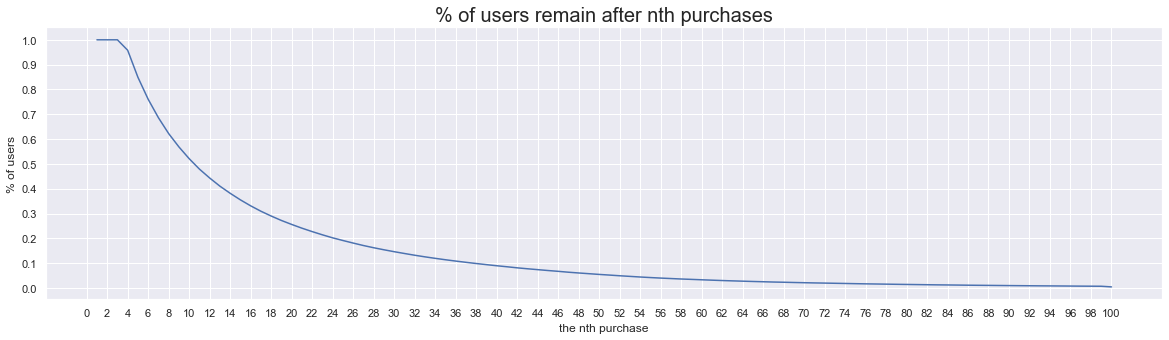

In [86]:
plt.figure(figsize = (20,5))
plt.plot(table['%_penetration'])
plt.xticks(np.arange(0,101,2))
plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('the nth purchase')
plt.ylabel('% of users')
plt.title('% of users remain after nth purchases', fontsize=20)
plt.show()

**Observation**: After the 4th purchase, users attrition rates is at ~5% per additional one re-purchase. By th 10th purchase, only 50% of users remain using the services. About 10% of the users making 38th purchase or more. Referring to the lag day chart, those purchase on average is 6 days difference, we could assume that those are loyal customers as they purchase something from Instacart every week.

### Exploring item per order trend

We are interested to see if there are consistence pattern on the number of product being adding to carts. Would number of items change as users re-order more often. We will use add_to_cart_order max value to make that equal to number of items purchases

In [87]:
# At overall order level
order_id_order = consol_detail.groupby(['order_id'])['add_to_cart_order'].max()
print('Average items per order are {:.2f}'.format(np.mean(order_id_order)))

Average items per order are 10.09


In [95]:
order_id_order_num = consol_detail.groupby(['order_id', 'order_number'])['add_to_cart_order'].max().reset_index()

In [97]:
order_num_item = order_id_order_num.groupby('order_number')['add_to_cart_order'].mean()

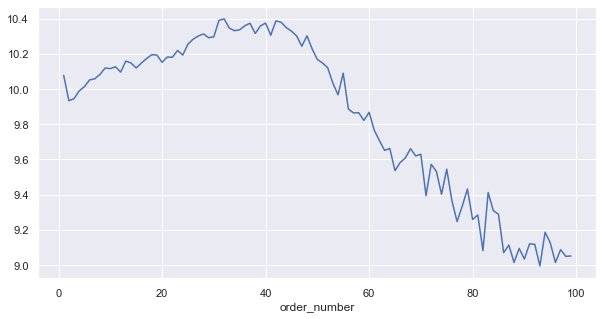

In [102]:
order_num_item.plot(figsize=(10,5))
plt.show()

**Observation**: On average, around 9-10 item are added to cart, The number of items per order is relatively stable.

### Summary of Learning
- Product categories has different re-order rate, among all beverage (water), diary eggs (milk, yogurt) and produce (fruits) are most popular items for re-ordering. Pantry items are the least likely to be re-ordered
- Users tend to purchase on day 0 and 1, from 9am to 4pm
- Most users who signed up will use the service for 3-4 times, on average 15 days between each other, then users attrition starts. Perhaps that's opportunity to improve user loyalty. 10% of the users become very loyal to the service and purchase among every week.
- In each order, around 9-10 items are added to carts.